# Various Regression Models for Cars CO2 Emissions

In [1]:
#Set up DA environment
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

In [2]:
df = pd.read_csv('../input/co2-emission-of-cars-dataset/DATA.csv') #read in data

In [3]:
df.head()

,Car,Model,Volume,Weight,CO2,Unnamed: 5
0,Toyota,Aygo,1000,790,99,NaN
1,Mitsubishi,Space Star,1200,1160,95,NaN
2,Skoda,Citigo,1000,929,95,NaN
3,Fiat,500,900,865,90,NaN
4,Mini,Cooper,1500,1140,105,NaN


In [4]:
#drop unnamed column
df=df.drop(['Unnamed: 5'], axis=1)

In [5]:
df.head()

,Car,Model,Volume,Weight,CO2
0,Toyota,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Car     36 non-null     object
 1   Model   36 non-null     object
 2   Volume  36 non-null     int64 
 3   Weight  36 non-null     int64 
 4   CO2     36 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.5+ KB


In [7]:
df.corr()

,Volume,Weight,CO2
Volume,1.000000,0.753537,0.592082
Weight,0.753537,1.000000,0.552150
CO2,0.592082,0.552150,1.000000


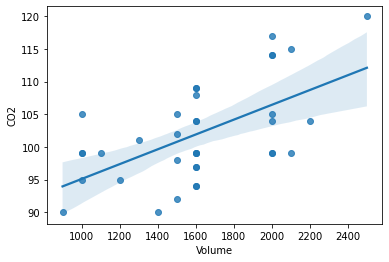

In [8]:
vreg = sns.regplot(x='Volume', y='CO2', data=df)

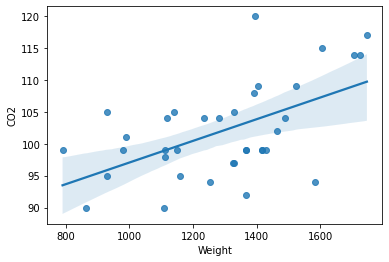

In [9]:
wreg = sns.regplot(x='Weight', y='CO2', data=df)

In [10]:
lm = LinearRegression()

In [11]:
X = df[['Volume', 'Weight']]
lm.fit(X, df['CO2'])

LinearRegression()

In [12]:
# coeff
lm.coef_

array([0.00780526, 0.00755095])

In [13]:
# intercept 
lm.intercept_

79.69471929115939

**CO2** = 79.6947 + 0.0076x**Volume** + 0.0078x**Weight**

In [14]:
Y_hat = lm.predict(X)

In [15]:
import matplotlib.pyplot as plt

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


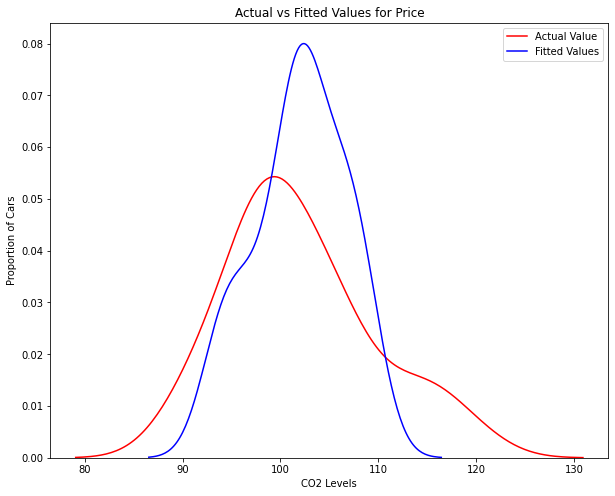

In [16]:
plt.figure(figsize=(10,8))

ax1 = sns.distplot(df['CO2'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('CO2 Levels')
plt.ylabel('Proportion of Cars')

plt.legend()
plt.show()
plt.close()

poorly fitted, let's add a polynomial model to the data.

In [17]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(800, 2500, 4000)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for CO2 ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('CO2 Emissions')

    plt.show()
    plt.close()

In [18]:
# set variables
x = df['Volume']
y = df['CO2']

fit the polynomial using the function <b>polyfit</b>, then use the function <b>poly1d</b> to display the polynomial function.

In [19]:
# fit the polynomial with 3rd order (cubic)
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

           3            2
3.402e-09 x - 8.28e-06 x + 0.01024 x + 91.59


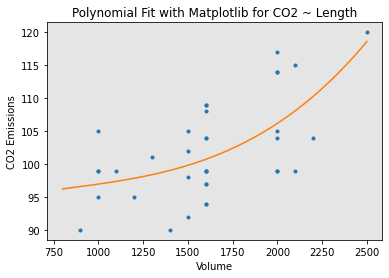

In [20]:
# plot the function
PlotPolly(p, x, y, 'Volume')

In [21]:
np.polyfit(x, y, 3)

array([ 3.40160231e-09, -8.28034007e-06,  1.02443137e-02,  9.15874971e+01])

           7             6             5             4             3
2.926e-19 x - 3.493e-15 x + 1.776e-11 x - 4.981e-08 x + 8.305e-05 x
            2
 - 0.08212 x + 44.45 x - 1.004e+04


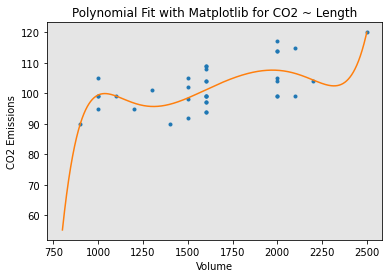

In [22]:
# 7 order polynomial
f1 = np.polyfit(x,y,7)
p1=np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Volume')

### Polynomial for Muliple Features

In [23]:
from sklearn.preprocessing import PolynomialFeatures

In [24]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [25]:
VW_pr=pr.fit_transform(X)

In [26]:
#original data
X.shape

(36, 2)

In [27]:
# after the transformation
VW_pr.shape

(36, 6)

### Create Pipline

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [29]:
# create list of tuples including the name of the model or estimator and its corresponding constructor
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [30]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [31]:
# Convert the data type X to type float to avoid conversion warnings that may appear as a result of STandardScaler taking float inputs
# Then, normalize the data, perform a transform and fit the model simultaneously
X = X.astype(float)
pipe.fit(X,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [32]:
ypipe = pipe.predict(X)
ypipe[:4]

array([100.56295221,  96.0727048 ,  97.36452779,  98.47584023])

In [33]:
# Pipeline that standardizes data
Input=[('scale',StandardScaler()),('model',LinearRegression())]
pipe=Pipeline(Input)

pipe.fit(X,y)

ypipe=pipe.predict(X)
ypipe[0:10]

array([ 93.46522516,  97.82012716,  94.51480683,  93.25102045,
       100.01068547,  94.51480683,  98.99608035, 101.70964861,
        99.79925895, 100.8667207 ])

## Evaluate Model

### Model 1

In [34]:
X1 = df[['Volume']]
Y1 = df['CO2']

In [35]:
# Model 1
lm.fit(X1,Y1) #Volume fit
print('The R-square is: ', lm.score(X1, Y1))

The R-square is:  0.3505608516055503


~ 35% of the variation of CO2 emissions is explained by this simple linear model

In [36]:
# calculate MSE
Yhat=lm.predict(X1)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [95.09347461 97.36288292 95.09347461 93.95877046]


In [37]:
#imprt function for **Mean Squared Error* (MSE)
from sklearn.metrics import mean_squared_error

In [38]:
mse = mean_squared_error(df['CO2'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  35.08725287919057


### Model 2

In [39]:
# fit the model
lm.fit(X, df['CO2'])
# Find R^2
print('The R-square is: ', lm.score(X, df['CO2']))

The R-square is:  0.3765564043619989


In [40]:
# calculate MSE
X_predict_multifit = lm.predict(X)

In [41]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['CO2'], X_predict_multifit))

The mean square error of price and predicted value using multifit is:  33.68279098995154


### Model 3: Polynomial Fit

In [42]:
# import r2_score function
from sklearn.metrics import r2_score

In [43]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.3961803906898165


~ 40% of the variation of CO2 is explained by this polynomial fit (3rd order)

In [44]:
mean_squared_error(df['CO2'], p(x))

32.622565759482825

In [45]:
r_squared = r2_score(y, p1(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.4734938761985814


~ 47% of the variation of CO2 is explained by this polynomial fit (7th order)

In [46]:
# calculate mse
mean_squared_error(df['CO2'], p1(x))

28.445549600657046

# Prediction and Decision Making

### Prediction

In [47]:
# create new input
new_input=np.arange(750, 2500, 750).reshape(-1, 1)

In [48]:
lm.fit(X1,Y1)
lm

LinearRegression()

In [49]:
yhat=lm.predict(new_input)
yhat[0:5]

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([ 92.25671423, 100.76699538, 109.27727654])

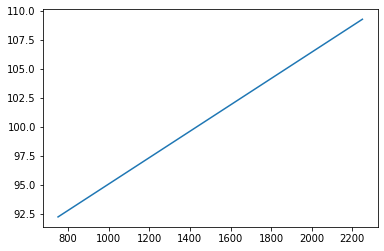

In [50]:
plt.plot(new_input, yhat)
plt.show()

### Decision Making

#### Look at different models:

Simple Linear Regression: Using car Volume as a predictor variable of CO2 emissions.

- R-Squared: 0.3506
- MSE: 45.0873

Multiple Linear Regression: Using Volume and Weight as predictor variables of CO2 emissions.

- R-Squared: 0.3766
- MSE: 33.6828

Polynomial Fit(3rd order): Using Volume as a predictor variable of CO2 emissions.

- R-Squared: 0.3962
- MSE: 

Polynomial Fit(7th order): Using Volume as a predictor variable of CO2 emissions.

- R-Squared: 0.4735
- MSE: 28.4455

# Conclusion

Polynomial fit(7th order) is the best model for predicting CO2 emissions. It makes sense this does better the MLR model because there are only two factors in this data set and they both have very similar correlation.

**Note/Follow up** only 3rd order and 7th order polynomial fits were tried, other order could potentially be tested.